In [ ]:
# in previous project 5
# Train Accuracy: 0.6954
# Test Accuracy:  0.6144
# we see that our model is mild overfit
# so in this project apply all methods and update these methods to prevent overfitting and underfitting and enhance model accuracy.
# continue in project 5

#  **Heart Attack Risk Prediction Using Deep Learning: A Classification Approach**

### **Problem Statement:**  
Cardiovascular diseases, including heart attacks, are a leading cause of death globally. Early prediction of heart attack risk can significantly improve preventive care and save lives. This project aims to develop a **Feedforward Neural Network (FNN) model** to classify patients into two categories:  
- **0 (Low Risk)**  
- **1 (High Risk)**  

The goal is to identify key risk factors from patient health data and build an accurate predictive model to assist healthcare professionals in early intervention.

---

### **Business Insights:**  
1. **Healthcare Cost Reduction:** Early risk prediction can reduce emergency treatments and long-term healthcare costs.  
2. **Preventive Care:** Enables targeted lifestyle interventions (e.g., diet, exercise) for high-risk patients.  
3. **Resource Allocation:** Hospitals can prioritize high-risk patients for monitoring and treatment.  
4. **Insurance Optimization:** Insurance companies can adjust premiums or offer wellness programs based on risk profiles.  

---

### **Feature Importance Analysis:**  

#### **Highly Important Features (Likely Strong Predictors):**  
1. **Age** – Older individuals are at higher risk.  
2. **Cholesterol** – High cholesterol is linked to heart disease.  
3. **Blood Pressure** (Systolic/Diastolic) – Hypertension increases risk.  
4. **Diabetes** (Binary) – Diabetics have higher cardiovascular risk.  
5. **Smoking** (Binary) – Smoking is a major risk factor.  
6. **Obesity** (Binary) – Linked to heart strain.  
7. **Previous Heart Problems** – History indicates recurrence risk.  
8. **Stress Level** – Chronic stress affects heart health.  
9. **Physical Activity Days Per Week** – Inactivity increases risk.  
10. **BMI** – High BMI correlates with heart disease.  

#### **Moderately Important Features:**  
1. **Family History** – Genetic predisposition matters but is less actionable.  
2. **Alcohol Consumption** – Moderate impact; excessive drinking harms the heart.  
3. **Exercise Hours Per Week** – Similar to physical activity days.  
4. **Diet** (Categorical: Healthy/Average/Unhealthy) – Indirectly affects risk.  
5. **Triglycerides** – High levels may indicate risk.  

#### **Less Important Features (Can Potentially Be Dropped):**  
1. **Patient ID** – Identifier, not predictive.  
2. **Country/Continent/Hemisphere** – Geographic data may not directly influence risk.  
3. **Income** – Socioeconomic impact is indirect.  
4. **Sedentary Hours Per Day** – Overlaps with physical activity metrics.  
5. **Sleep Hours Per Day** – Less directly linked than other factors.  

---

### **Target Feature for Classification:**  
- **`Heart Attack Risk` (Binary: 0 or 1)**  
  - **0 = No Risk**  
  - **1 = At Risk**  


* This project will leverage deep learning to predict heart attack risk, focusing on clinically relevant features while optimizing model performance for real-world healthcare applications.

## **1. Load Libraries and Dataset**

In [ ]:
# For data manipulation and analysis
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# For deep learning model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical


# For evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
import os #Manually Delete Old Files Before re-uploading, delete any existing files with the same name to prevent renaming:

file_path = "heart_attack_prediction_dataset_classification.csv"
if os.path.exists(file_path):
    os.remove(file_path)

 #uploaded = files.upload()

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving heart_attack_prediction_dataset_classification.csv to heart_attack_prediction_dataset_classification.csv
User uploaded file "heart_attack_prediction_dataset_classification.csv" with length 1456385 bytes


In [ ]:
import io
data=pd.read_csv(io.StringIO(uploaded['heart_attack_prediction_dataset_classification.csv'].decode('utf-8')))
data.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [ ]:
data.shape

(8763, 26)

In [ ]:
data.drop(columns='Patient ID',inplace=True)

In [ ]:
data.shape

(8763, 25)

## **2. Data Preprocessing**

### **2.1. Handle Missing Values**

In [ ]:
data.isnull().sum()

,0
Age,0
Sex,0
Cholesterol,0
Blood Pressure,0
Heart Rate,0
Diabetes,0
Family History,0
Smoking,0
Obesity,0
Alcohol Consumption,0


### **2.2. Handle Duplicates**

In [ ]:
data.duplicated().sum()

0

### **2.3. Handle inconsistencies and errors**

In [ ]:
# our data is cleaned

### **2.4. Encoding**

In [ ]:
data.dtypes

,0
Age,int64
Sex,object
Cholesterol,int64
Blood Pressure,object
Heart Rate,int64
Diabetes,int64
Family History,int64
Smoking,int64
Obesity,int64
Alcohol Consumption,int64


In [ ]:
object_columns = data.select_dtypes(include='object').columns
print(list(object_columns))


['Sex', 'Blood Pressure', 'Diet', 'Country', 'Continent', 'Hemisphere']


In [ ]:
# handle the column "Sex"
data['Sex'].value_counts()

,count
Sex,
Male,6111
Female,2652


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Fit and transform the 'Sex' column
data['Sex'] = label_encoder.fit_transform(data['Sex'])

In [ ]:
data['Sex'].value_counts()

,count
Sex,
1,6111
0,2652


In [ ]:
# Handle the column "Blood Pressure"
data['Blood Pressure'].nunique()

3915

In [ ]:
data['Blood Pressure'].unique()

array(['158/88', '165/93', '174/99', ..., '137/94', '94/76', '119/67'],
      dtype=object)

In [ ]:
# Split the 'Blood Pressure' column into two numeric columns
data[['Systolic_BP', 'Diastolic_BP']] = data['Blood Pressure'].str.split('/', expand=True).astype(int)

# Drop the original 'Blood Pressure' column if no longer needed
data.drop('Blood Pressure', axis=1, inplace=True)


In [ ]:
data.shape

(8763, 26)

In [ ]:
# Handle the column "Diet"
data['Diet'].value_counts()

,count
Diet,
Healthy,2960
Average,2912
Unhealthy,2891


In [ ]:
data['Diet'].dtype

dtype('O')

In [ ]:
data['Diet'].unique()

array(['Average', 'Unhealthy', 'Healthy'], dtype=object)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder(categories=[['Unhealthy', 'Average', 'Healthy']]) # Unhealthy < Average < Healthy
data['Diet'] = encoder.fit_transform(data[['Diet']])


In [ ]:
data['Diet'].dtype

dtype('float64')

In [ ]:
data['Diet'].value_counts()


,count
Diet,
2.0,2960
1.0,2912
0.0,2891


In [ ]:
# Handle the column "Country"
data['Country'].value_counts()

,count
Country,
Germany,477
Argentina,471
Brazil,462
United Kingdom,457
Australia,449
Nigeria,448
France,446
Canada,440
China,436


In [ ]:
data

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,Systolic_BP,Diastolic_BP
0,67,1,208,72,0,0,1,0,0,4.168189,...,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0,158,88
1,21,1,389,98,1,1,1,1,1,1.813242,...,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0,165,93
2,21,0,324,72,1,0,0,0,0,2.078353,...,28.176571,587,4,4,France,Europe,Northern Hemisphere,0,174,99
3,84,1,383,73,1,1,1,0,1,9.828130,...,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0,163,100
4,66,1,318,93,1,1,1,1,0,5.804299,...,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0,91,88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,60,1,121,61,1,1,1,0,1,7.917342,...,19.655895,67,7,7,Thailand,Asia,Northern Hemisphere,0,94,76
8759,28,0,120,73,1,0,0,1,0,16.558426,...,23.993866,617,4,9,Canada,North America,Northern Hemisphere,0,157,102
8760,47,1,250,105,0,1,1,1,1,3.148438,...,35.406146,527,4,4,Brazil,South America,Southern Hemisphere,1,161,75
8761,36,1,178,60,1,0,1,0,0,3.789950,...,27.294020,114,2,8,Brazil,South America,Southern Hemisphere,0,119,67


In [ ]:
data['Hemisphere'].value_counts()

,count
Hemisphere,
Northern Hemisphere,5660
Southern Hemisphere,3103


In [ ]:
data['Continent'].value_counts()

,count
Continent,
Asia,2543
Europe,2241
South America,1362
Australia,884
Africa,873
North America,860


In [ ]:
# Country/Continent/Hemisphere – Geographic data may not directly influence risk. so drop these three columns.
data.drop(columns=['Country','Continent','Hemisphere'],inplace=True)

In [ ]:
data.dtypes

,0
Age,int64
Sex,int64
Cholesterol,int64
Heart Rate,int64
Diabetes,int64
Family History,int64
Smoking,int64
Obesity,int64
Alcohol Consumption,int64
Exercise Hours Per Week,float64


### **2.5. Handle Outliers**

In [ ]:
# Calculate outlier percentage for all features in the dataset using IQR method
def calculate_outlier_percentages(df):
    outlier_percentages = {}
    for col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
        outlier_percentages[col] = len(outliers) / len(df) * 100  # Percentage of outliers
    return outlier_percentages

outlier_percentages_all = calculate_outlier_percentages(data)
outlier_percentages_all

{'Age': 0.0,
 'Sex': 0.0,
 'Cholesterol': 0.0,
 'Heart Rate': 0.0,
 'Diabetes': 0.0,
 'Family History': 0.0,
 'Smoking': 10.316101791623874,
 'Obesity': 0.0,
 'Alcohol Consumption': 0.0,
 'Exercise Hours Per Week': 0.0,
 'Diet': 0.0,
 'Previous Heart Problems': 0.0,
 'Medication Use': 0.0,
 'Stress Level': 0.0,
 'Sedentary Hours Per Day': 0.0,
 'Income': 0.0,
 'BMI': 0.0,
 'Triglycerides': 0.0,
 'Physical Activity Days Per Week': 0.0,
 'Sleep Hours Per Day': 0.0,
 'Heart Attack Risk': 0.0,
 'Systolic_BP': 0.0,
 'Diastolic_BP': 0.0}

## **3. SCALLING**

In [ ]:
data.shape

(8763, 23)

In [ ]:
data.head(2)

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk,Systolic_BP,Diastolic_BP
0,67,1,208,72,0,0,1,0,0,4.168189,...,9,6.615001,261404,31.251233,286,0,6,0,158,88
1,21,1,389,98,1,1,1,1,1,1.813242,...,1,4.963459,285768,27.194973,235,1,7,0,165,93


In [ ]:
# also "Income" does not impaact the heart attack risks. so drop it
data.drop(columns='Income',inplace=True)

In [ ]:
data.shape

(8763, 22)

In [ ]:
x = data.drop(columns="Heart Attack Risk")
y = data['Heart Attack Risk']

In [ ]:
y.value_counts()

,count
Heart Attack Risk,
0,5624
1,3139


In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter
# Apply SMOTE
smote = SMOTE(random_state=42)
x, y = smote.fit_resample(x, y)

In [ ]:
y.value_counts()

,count
Heart Attack Risk,
0,5624
1,5624


In [1]:
# Scaling the features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

NameError: name 'StandardScaler' is not defined

In [ ]:
# Ensure X remains a DataFrame
# x_scaled is need in dataframe because in correlation .corr is work with dataframe, and x_scaled is a numpay array.
X = pd.DataFrame(x_scaled, columns=data.drop(columns=['Heart Attack Risk']).columns)

In [ ]:
X.head(2)

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Systolic_BP,Diastolic_BP
0,0.634713,0.731535,-0.650751,-0.142233,-1.232538,-0.881758,0.36682,-0.896505,-1.097751,-1.056290,...,-0.889108,-0.892961,1.322941,0.191567,0.383881,-0.594827,-1.532497,-0.475865,0.869929,0.207607
1,-1.564024,0.731535,1.593288,1.142302,0.811334,1.134098,0.36682,1.115443,0.910953,-1.477838,...,1.124723,-0.892961,-1.581764,-0.302364,-0.279762,-0.821299,-1.079962,0.046027,1.139013,0.557433


## **4. FEATURE SELECTION**

In [ ]:
# Feature Selection using Statistical Tests (ANOVA F-test)
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression
import numpy as np
selector = SelectKBest(score_func=f_regression, k=min(5, X.shape[1]))
X_selected = selector.fit_transform(X, y)
scores = selector.scores_
selected_features_stat = X.columns[np.argsort(scores)[-min(5, X.shape[1]):]]  # Select top features
print("Top Features based on Statistical Test:", selected_features_stat.tolist())

Top Features based on Statistical Test: ['Medication Use', 'Previous Heart Problems', 'Family History', 'Alcohol Consumption', 'Obesity']


In [ ]:
# Select features with high correlation (absolute > 0.2)
corr_threshold = 0.2
correlation = X.corrwith(y).abs()
selected_features_corr = correlation[correlation > corr_threshold].index.tolist()
print("Selected Features based on Correlation:", selected_features_corr)

Selected Features based on Correlation: []


In [ ]:
# Feature Selection using Mutual Information
mi_scores = mutual_info_regression(X, y)
mi_selected_features = X.columns[np.argsort(mi_scores)[-min(5, X.shape[1]):]]  # Select top features
print("Top Features based on Mutual Information:", mi_selected_features.tolist())

Top Features based on Mutual Information: ['Medication Use', 'Alcohol Consumption', 'Stress Level', 'Family History', 'Diet']


In [ ]:
# Final selected features
final_selected_features = list(set(selected_features_corr) | set(selected_features_stat) | set(mi_selected_features))
print("Final Selected Features:", final_selected_features)

Final Selected Features: ['Previous Heart Problems', 'Family History', 'Alcohol Consumption', 'Medication Use', 'Stress Level', 'Obesity', 'Diet']


In [ ]:
X.shape

(11248, 21)

## **5. MODEL ARCHITECTURE**

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

# Define the model using the updated Sequential list-style
model = Sequential([
    Input(shape=(21,)),                                     # Input layer
    Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(16, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(1, activation='sigmoid')                          # Output layer (binary classification)
])


In [ ]:
'''from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
# Define the model
model = Sequential()

# Input layer + Hidden Layer 1
model.add(Dense(units=32, input_shape=(21,),kernel_regularizer=l2(0.001), activation='relu'))
model.add(Dropout(0.3))  # Dropout after first hidden layer

# Hidden Layer 2
model.add(Dense(units=16, kernel_regularizer=l2(0.001), activation='relu'))
model.add(Dropout(0.3))

# Output Layer (1 class for)
model.add(Dense(units=1, activation='sigmoid'))'''

"from tensorflow.keras.layers import Dense, Dropout\nfrom tensorflow.keras.regularizers import l2\nfrom tensorflow.keras.callbacks import EarlyStopping\n# Define the model\nmodel = Sequential()\n\n# Input layer + Hidden Layer 1\nmodel.add(Dense(units=32, input_shape=(21,),kernel_regularizer=l2(0.001), activation='relu'))\nmodel.add(Dropout(0.3))  # Dropout after first hidden layer\n\n# Hidden Layer 2\nmodel.add(Dense(units=16, kernel_regularizer=l2(0.001), activation='relu'))\nmodel.add(Dropout(0.3))\n\n# Output Layer (1 class for)\nmodel.add(Dense(units=1, activation='sigmoid'))"

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Show model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,249 (4.88 KB)

 Trainable params: 1,249 (4.88 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Early stopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [ ]:
model.fit(x_train, y_train, batch_size=10, epochs=100, callbacks=[early_stop], validation_split=0.2)

Epoch 1/100
720/720 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5367 - loss: 0.7795 - val_accuracy: 0.5933 - val_loss: 0.7078
Epoch 2/100
720/720 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5657 - loss: 0.7085 - val_accuracy: 0.6122 - val_loss: 0.6900
Epoch 3/100
720/720 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5990 - loss: 0.6950 - val_accuracy: 0.6139 - val_loss: 0.6802
Epoch 4/100
720/720 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6033 - loss: 0.6808 - val_accuracy: 0.6089 - val_loss: 0.6744
Epoch 5/100
720/720 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6070 - loss: 0.6722 - val_accuracy: 0.6178 - val_loss: 0.6694
Epoch 6/100
720/720 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6256 - loss: 0.6635 - val_accuracy: 0.6144 - val_loss: 0.6681
Epoch 7/100
720/720 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6216 - loss: 0.6654 - val_accuracy: 0.6122 - val_loss: 0.6659
Epoch 8/100
720/720 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6270 - loss: 0.6605 - val_accu

In [ ]:
# Predicting the Test set results
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5)

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)*100
print("Prediction Accuracy:", accuracy)

Prediction Accuracy: 62.66666666666667


In [ ]:
# Evaluate on train and test
train_loss, train_acc = model.evaluate(x_train, y_train, verbose=0)
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)

print(f"Train Accuracy: {train_acc*100:.4f}")
print(f"Test Accuracy:  {test_acc*100:.4f}")

Train Accuracy: 63.7142
Test Accuracy:  62.6667


In [ ]:
y_pred.shape

(2250, 1)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.60      0.74      0.66      1122
           1       0.67      0.51      0.58      1128

    accuracy                           0.63      2250
   macro avg       0.63      0.63      0.62      2250
weighted avg       0.63      0.63      0.62      2250

[[833 289]
 [551 577]]


<Axes: >

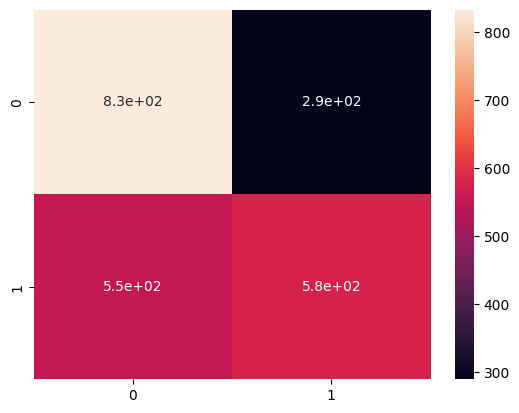

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

## **6.MODEL OPTIMIZATION**

### **6.1. Cross Validation**

In [ ]:
#!pip install scikit-learn==1.3.2 scikeras==0.12.0


In [ ]:
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2

# Build function
def build_classifier():
    model = Sequential([
        Dense(units=32, activation='relu', input_shape=(21,), kernel_regularizer=l2(0.001)),
        Dropout(0.3),
        Dense(units=16, activation='relu', kernel_regularizer=l2(0.001)),
        Dropout(0.3),
        Dense(units=1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# KerasClassifier wrapper (Scikeras format)
model = KerasClassifier(model=build_classifier, batch_size=100, epochs=100)

# Cross-validation
accuracies = cross_val_score(model, X=x_train, y=y_train, cv=10, n_jobs=-1)




ValueError: 
All the 10 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/scikeras/wrappers.py", line 1491, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "/usr/local/lib/python3.11/dist-packages/scikeras/wrappers.py", line 760, in fit
    self._fit(
  File "/usr/local/lib/python3.11/dist-packages/scikeras/wrappers.py", line 928, in _fit
    self._fit_keras_model(
  File "/usr/local/lib/python3.11/dist-packages/scikeras/wrappers.py", line 536, in _fit_keras_model
    raise e
  File "/usr/local/lib/python3.11/dist-packages/scikeras/wrappers.py", line 531, in _fit_keras_model
    key = metric_name(key)
          ^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/scikeras/utils/__init__.py", line 111, in metric_name
    fn_or_cls = keras_metric_get(metric)
                ^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/keras/src/metrics/__init__.py", line 211, in get
    raise ValueError(f"Could not interpret metric identifier: {identifier}")
ValueError: Could not interpret metric identifier: loss


In [ ]:
# Output accuracies
print(f"Cross-validation accuracies: {accuracies}")

In [ ]:
print(f"Minimum Accuracy: {accuracies.min():.4f}")
print(f"Maximum Accuracy: {accuracies.max():.4f}")

### **6.2. Hyperparameter Tunning**

In [ ]:
import keras
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
# Build function
def build_classifier(optimizer = 'adam'):
    model = Sequential()
    model.add(Dense(units=32, activation='relu', input_shape=(21,), kernel_regularizer=l2(0.001)))
    model.add(Dropout(0.3))
    model.add(Dense(units=16, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dropout(0.3))
    model.add(Dense(units=1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn = build_classifier)
parameters = {'batch_size': [10, 32],'epochs': [100, 500],'optimizer': ['adam', 'rmsprop']}
grid_search = GridSearchCV(estimator = model, param_grid = parameters, scoring = 'accuracy',
                           cv = 10)

grid_search = grid_search.fit(x_train, y_train)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_